In [7]:
import pandas as pd

# rank to compare at:
rank = 'genus'

# output of the other notebooks
prot_df = pd.read_csv(f'podar-protein-{rank}.csv')
dna_df = pd.read_csv(f'podar-dna-{rank}.csv')

In [8]:
prot_df.columns = ['unnamed', 'name', 'prot_hashes', 'prot_best_hashes', 'prot_lineage']

In [9]:
prot_df.set_index("name")
prot_df.reset_index()

dna_df.set_index("name")
_ = dna_df.reset_index()

In [10]:
merged_df = dna_df.merge(prot_df, on='name', how='outer', indicator=True)
merged_df['prot_hashes'] = merged_df['prot_hashes'].fillna(0)

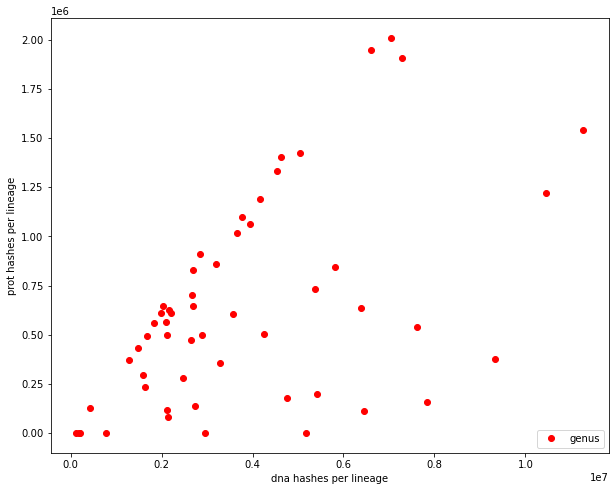

In [11]:
%matplotlib inline
from matplotlib import pylab
pylab.figure(num=None, figsize=(10, 8))

pylab.plot(merged_df.hashes, merged_df.prot_hashes, 'ro', label=rank)
#pylab.plot([0, max(merged_df.hashes)], [0, max(merged_df.prot_hashes)], '--', label='y = x')
#pylab.plot([0, 0.5*max(merged_df.hashes)], [0, max(merged_df.prot_hashes)], '--', label='y = 0.5x')
pylab.xlabel("dna hashes per lineage")
pylab.ylabel("prot hashes per lineage")
pylab.legend(loc='lower right')
pylab.savefig(f'/tmp/protein-vs-dna-gather-podar-{rank}.png')

In [12]:
pd.set_option('display.max_colwidth', 100)
merged_df[merged_df['prot_hashes'] == 0]

,Unnamed: 0,name,hashes,best_hashes,lineage,unnamed,prot_hashes,prot_best_hashes,prot_lineage,_merge
13,13.0,Bacteria;Proteobacteria;Betaproteobacteria;Burkholderiales;Alcaligenaceae;Bordetella,5167000.0,5167000.0,"(LineagePair(rank='superkingdom', name='Bacteria'), LineagePair(rank='phylum', name='Proteobacte...",NaN,0.0,NaN,NaN,left_only
26,26.0,Bacteria;Chlorobi;Chlorobia;Chlorobiales;Chlorobiaceae;Pelodictyon,2963000.0,2963000.0,"(LineagePair(rank='superkingdom', name='Bacteria'), LineagePair(rank='phylum', name='Chlorobi'),...",NaN,0.0,NaN,NaN,left_only
49,49.0,Bacteria;Firmicutes;Bacilli;Lactobacillales;Streptococcaceae;Streptococcus,773000.0,474000.0,"(LineagePair(rank='superkingdom', name='Bacteria'), LineagePair(rank='phylum', name='Firmicutes'...",NaN,0.0,NaN,NaN,left_only
51,51.0,Bacteria;Proteobacteria;Gammaproteobacteria;Xanthomonadales;Xanthomonadaceae;Stenotrophomonas,211000.0,211000.0,"(LineagePair(rank='superkingdom', name='Bacteria'), LineagePair(rank='phylum', name='Proteobacte...",NaN,0.0,NaN,NaN,left_only
52,52.0,Bacteria;Cyanobacteria;;Chroococcales;;,195000.0,195000.0,"(LineagePair(rank='superkingdom', name='Bacteria'), LineagePair(rank='phylum', name='Cyanobacter...",NaN,0.0,NaN,NaN,left_only
53,53.0,Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Enterobacteriaceae;Escherichia,119000.0,119000.0,"(LineagePair(rank='superkingdom', name='Bacteria'), LineagePair(rank='phylum', name='Proteobacte...",NaN,0.0,NaN,NaN,left_only
